In [38]:
import pandas
import numpy
import tensorflow
import matplotlib.pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

#load the csv file and rename the columns
loanDefaultDataset = pandas.read_csv( 'LoanDefaultData.csv' )

loanDefaultDataset.rename( { 'BAD': 'defaultResult', 'LOAN': 'loanRequested', 'MORTDUE': 'currentMortageDue',\
                             'VALUE': 'currentPropertyValue', 'REASON': 'reasonForRequest', 'JOB': 'Job',\
                             'YOJ': 'yearsAtJob', 'DEROG': 'derogatoryReports', 'DELINQ': 'delinquentLines',\
                             'CLAGE': 'ageOldestTradeLine', 'NINQ': 'recentCreditLines', 'CLNO': 'totalCreditLines',\
                             'DEBTINC': 'debtToIncome' }, inplace = True, axis = 'columns' )

In [2]:

#replace nan values with averages and modes
loanDefaultDataset.currentMortageDue.fillna( loanDefaultDataset.currentMortageDue.mean(), inplace = True )

loanDefaultDataset.currentPropertyValue.fillna( loanDefaultDataset.currentPropertyValue.mean(), inplace = True )

loanDefaultDataset.reasonForRequest.fillna( loanDefaultDataset.reasonForRequest.mode().iloc[ 0 ] , inplace = True )

loanDefaultDataset.Job.fillna( loanDefaultDataset.Job.mode().iloc[ 0 ], inplace = True )

loanDefaultDataset.yearsAtJob.fillna( loanDefaultDataset.yearsAtJob.mean(), inplace = True )

loanDefaultDataset.derogatoryReports.fillna( loanDefaultDataset.derogatoryReports.mode().iloc[ 0 ], inplace = True )

loanDefaultDataset.delinquentLines.fillna( loanDefaultDataset.delinquentLines.mode().iloc[ 0 ], inplace = True )

loanDefaultDataset.ageOldestTradeLine.fillna( loanDefaultDataset.ageOldestTradeLine.mean(), inplace = True )

loanDefaultDataset.recentCreditLines.fillna( loanDefaultDataset.recentCreditLines.mode().iloc[ 0 ], inplace = True )

loanDefaultDataset.totalCreditLines.fillna( loanDefaultDataset.totalCreditLines.mode().iloc[ 0 ], inplace = True )

loanDefaultDataset.debtToIncome.fillna( loanDefaultDataset.debtToIncome.mean(), inplace = True )

#one hot encode the dataframe
loanDefaultDataset = pandas.get_dummies( loanDefaultDataset )

In [3]:
#normalize the data
loanDefaultDatasetColumns = loanDefaultDataset.columns

SklearnMinMaxScaler = MinMaxScaler( copy = False )

SklearnMinMaxScaler.fit( loanDefaultDataset )

loanDefaultDataset = SklearnMinMaxScaler.transform( loanDefaultDataset )

loanDefaultDataset = pandas.DataFrame( loanDefaultDataset, columns = loanDefaultDatasetColumns );



In [4]:
#split the data into train, validation and test sets
loanDefaultDataSetTargets = loanDefaultDataset[ 'defaultResult' ]
loanDefaultDataSetFeatures = loanDefaultDataset.drop( [ 'defaultResult' ], axis = 'columns' )


loanDefaultDataSetTargetsTrain = loanDefaultDataSetTargets[ :4500 ]
loanDefaultDataSetTargetsValidation = loanDefaultDataSetTargets[ 4500:5000 ]
loanDefaultDataSetTargetsTest =  loanDefaultDataSetTargets[ 5000: ]


loanDefaultDataSetFeaturesTrain = loanDefaultDataSetFeatures[ :4500 ]
loanDefaultDataSetFeaturesValidation = loanDefaultDataSetFeatures[ 4500:5000 ]
loanDefaultDataSetFeaturesTest =  loanDefaultDataSetFeatures[ 5000: ]


In [82]:
#find best parameters for binary classifier
binaryClassifier = Sequential()


loanDefaultDataSetFeatures.shape 
binaryClassifier.add( Dense( 32, activation = 'relu', input_shape = ( 18, ) ) )
binaryClassifier.add( Dropout( 0.55 ) )
binaryClassifier.add( Dense( 1, activation = 'sigmoid' ) )


binaryClassifier.compile(optimizer = 'rmsprop', 
                         loss = 'binary_crossentropy', 
                         metrics = [ 'binary_accuracy' ])


binaryClassifierHistory = binaryClassifier.fit(loanDefaultDataSetFeaturesTrain, 
                         loanDefaultDataSetTargetsTrain, 
                         batch_size = 4500, 
                         epochs = 5000,
                         validation_data = ( loanDefaultDataSetFeaturesValidation, loanDefaultDataSetTargetsValidation ),
                         verbose = False);


binaryClassifierHistory = binaryClassifierHistory.history

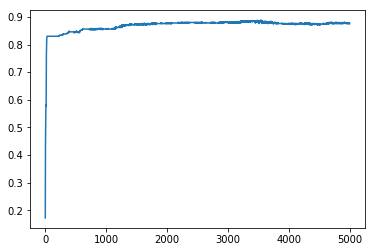

In [83]:
#plot validation accuracy
validationBinaryAccuracy = binaryClassifierHistory[ 'val_binary_accuracy' ] 


matplotlib.pyplot.plot( range( 5000 ), validationAccuracy );




In [94]:

#train classifier with best parameters found on all train data
loanDefaultDataSetFeaturesTrainFinal = pandas.concat([loanDefaultDataSetFeaturesTrain,
                                                      loanDefaultDataSetFeaturesValidation],
                                                     axis = 0)

loanDefaultDataSetTargetsTrainFinal = pandas.concat([loanDefaultDataSetTargetsTrain, 
                                                     loanDefaultDataSetTargetsValidation],
                                                    axis = 0)


binaryClassifierHistoryFinal = binaryClassifier.fit(loanDefaultDataSetFeaturesTrainFinal, 
                                              loanDefaultDataSetTargetsTrainFinal, 
                                              batch_size = 5000, 
                                              epochs = 4000,
                                              validation_data = ( loanDefaultDataSetFeaturesTest, loanDefaultDataSetTargetsTest ) )


# binaryClassifierHistoryFinal = binaryClassifierHistoryFinal.history

      
    

Train on 5000 samples, validate on 960 samples
Epoch 1/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3162 - binary_accuracy: 0.8758 - val_loss: 0.5907 - val_binary_accuracy: 0.7979
Epoch 2/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3133 - binary_accuracy: 0.8790 - val_loss: 0.5880 - val_binary_accuracy: 0.7990
Epoch 3/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3153 - binary_accuracy: 0.8784 - val_loss: 0.5860 - val_binary_accuracy: 0.7990
Epoch 4/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3205 - binary_accuracy: 0.8770 - val_loss: 0.5897 - val_binary_accuracy: 0.7958
Epoch 5/4000
5000/5000 [==============================] - 0s 0us/step - loss: 0.3153 - binary_accuracy: 0.8794 - val_loss: 0.5911 - val_binary_accuracy: 0.7948
Epoch 6/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3113 - binary_accuracy: 0.8820 - val_loss: 0.5916 - val_binary_accuracy: 

Epoch 52/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3151 - binary_accuracy: 0.8766 - val_loss: 0.5877 - val_binary_accuracy: 0.7979
Epoch 53/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3127 - binary_accuracy: 0.8794 - val_loss: 0.5868 - val_binary_accuracy: 0.7979
Epoch 54/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3157 - binary_accuracy: 0.8808 - val_loss: 0.5870 - val_binary_accuracy: 0.8010
Epoch 55/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3126 - binary_accuracy: 0.8822 - val_loss: 0.5863 - val_binary_accuracy: 0.7969
Epoch 56/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3086 - binary_accuracy: 0.8808 - val_loss: 0.5903 - val_binary_accuracy: 0.7969
Epoch 57/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3147 - binary_accuracy: 0.8778 - val_loss: 0.5925 - val_binary_accuracy: 0.7969
Epoch 58/4000
5000/5000 [=========

Epoch 103/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3131 - binary_accuracy: 0.8806 - val_loss: 0.5955 - val_binary_accuracy: 0.7958
Epoch 104/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3156 - binary_accuracy: 0.8774 - val_loss: 0.5901 - val_binary_accuracy: 0.7958
Epoch 105/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3124 - binary_accuracy: 0.8780 - val_loss: 0.5898 - val_binary_accuracy: 0.7979
Epoch 106/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3186 - binary_accuracy: 0.8778 - val_loss: 0.5916 - val_binary_accuracy: 0.7969
Epoch 107/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3161 - binary_accuracy: 0.8806 - val_loss: 0.5924 - val_binary_accuracy: 0.7969
Epoch 108/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3222 - binary_accuracy: 0.8746 - val_loss: 0.5914 - val_binary_accuracy: 0.7937
Epoch 109/4000
5000/5000 [==

Epoch 154/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3055 - binary_accuracy: 0.8820 - val_loss: 0.6013 - val_binary_accuracy: 0.7917
Epoch 155/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3195 - binary_accuracy: 0.8764 - val_loss: 0.5997 - val_binary_accuracy: 0.7927
Epoch 156/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3119 - binary_accuracy: 0.8788 - val_loss: 0.6014 - val_binary_accuracy: 0.7927
Epoch 157/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3187 - binary_accuracy: 0.8796 - val_loss: 0.5985 - val_binary_accuracy: 0.7927
Epoch 158/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3031 - binary_accuracy: 0.8806 - val_loss: 0.5983 - val_binary_accuracy: 0.7927
Epoch 159/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3187 - binary_accuracy: 0.8744 - val_loss: 0.6025 - val_binary_accuracy: 0.7927
Epoch 160/4000
5000/5000 [==

Epoch 205/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3161 - binary_accuracy: 0.8776 - val_loss: 0.6061 - val_binary_accuracy: 0.7906
Epoch 206/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3071 - binary_accuracy: 0.8826 - val_loss: 0.6042 - val_binary_accuracy: 0.7917
Epoch 207/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3148 - binary_accuracy: 0.8780 - val_loss: 0.6051 - val_binary_accuracy: 0.7917
Epoch 208/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3122 - binary_accuracy: 0.8800 - val_loss: 0.6054 - val_binary_accuracy: 0.7917
Epoch 209/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3122 - binary_accuracy: 0.8820 - val_loss: 0.6103 - val_binary_accuracy: 0.7896
Epoch 210/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3109 - binary_accuracy: 0.8800 - val_loss: 0.6071 - val_binary_accuracy: 0.7917
Epoch 211/4000
5000/5000 [==

Epoch 256/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3134 - binary_accuracy: 0.8834 - val_loss: 0.6010 - val_binary_accuracy: 0.7906
Epoch 257/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3105 - binary_accuracy: 0.8806 - val_loss: 0.6045 - val_binary_accuracy: 0.7906
Epoch 258/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3126 - binary_accuracy: 0.8790 - val_loss: 0.6017 - val_binary_accuracy: 0.7906
Epoch 259/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3138 - binary_accuracy: 0.8780 - val_loss: 0.6082 - val_binary_accuracy: 0.7885
Epoch 260/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3127 - binary_accuracy: 0.8802 - val_loss: 0.6100 - val_binary_accuracy: 0.7906
Epoch 261/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3153 - binary_accuracy: 0.8808 - val_loss: 0.6070 - val_binary_accuracy: 0.7917
Epoch 262/4000
5000/5000 [==

Epoch 307/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3109 - binary_accuracy: 0.8784 - val_loss: 0.6136 - val_binary_accuracy: 0.7875
Epoch 308/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3215 - binary_accuracy: 0.8794 - val_loss: 0.6152 - val_binary_accuracy: 0.7875
Epoch 309/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3169 - binary_accuracy: 0.8784 - val_loss: 0.6194 - val_binary_accuracy: 0.7885
Epoch 310/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3076 - binary_accuracy: 0.8826 - val_loss: 0.6144 - val_binary_accuracy: 0.7875
Epoch 311/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3126 - binary_accuracy: 0.8810 - val_loss: 0.6140 - val_binary_accuracy: 0.7875
Epoch 312/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3126 - binary_accuracy: 0.8822 - val_loss: 0.6108 - val_binary_accuracy: 0.7875
Epoch 313/4000
5000/5000 [==

Epoch 358/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3137 - binary_accuracy: 0.8794 - val_loss: 0.6174 - val_binary_accuracy: 0.7865
Epoch 359/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3106 - binary_accuracy: 0.8816 - val_loss: 0.6239 - val_binary_accuracy: 0.7844
Epoch 360/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3163 - binary_accuracy: 0.8768 - val_loss: 0.6228 - val_binary_accuracy: 0.7854
Epoch 361/4000
5000/5000 [==============================] - 0s 5us/step - loss: 0.3062 - binary_accuracy: 0.8828 - val_loss: 0.6250 - val_binary_accuracy: 0.7854
Epoch 362/4000
5000/5000 [==============================] - 0s 6us/step - loss: 0.3115 - binary_accuracy: 0.8802 - val_loss: 0.6207 - val_binary_accuracy: 0.7854
Epoch 363/4000
5000/5000 [==============================] - 0s 5us/step - loss: 0.3177 - binary_accuracy: 0.8816 - val_loss: 0.6157 - val_binary_accuracy: 0.7875
Epoch 364/4000
5000/5000 [==

Epoch 409/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3138 - binary_accuracy: 0.8788 - val_loss: 0.6303 - val_binary_accuracy: 0.7844
Epoch 410/4000
5000/5000 [==============================] - 0s 6us/step - loss: 0.3209 - binary_accuracy: 0.8758 - val_loss: 0.6304 - val_binary_accuracy: 0.7844
Epoch 411/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3122 - binary_accuracy: 0.8784 - val_loss: 0.6299 - val_binary_accuracy: 0.7844
Epoch 412/4000
5000/5000 [==============================] - 0s 5us/step - loss: 0.3126 - binary_accuracy: 0.8806 - val_loss: 0.6251 - val_binary_accuracy: 0.7865
Epoch 413/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3172 - binary_accuracy: 0.8774 - val_loss: 0.6242 - val_binary_accuracy: 0.7854
Epoch 414/4000
5000/5000 [==============================] - 0s 5us/step - loss: 0.3111 - binary_accuracy: 0.8800 - val_loss: 0.6270 - val_binary_accuracy: 0.7833
Epoch 415/4000
5000/5000 [==

Epoch 460/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3064 - binary_accuracy: 0.8822 - val_loss: 0.6288 - val_binary_accuracy: 0.7833
Epoch 461/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3139 - binary_accuracy: 0.8784 - val_loss: 0.6240 - val_binary_accuracy: 0.7854
Epoch 462/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3101 - binary_accuracy: 0.8814 - val_loss: 0.6235 - val_binary_accuracy: 0.7854
Epoch 463/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3102 - binary_accuracy: 0.8832 - val_loss: 0.6274 - val_binary_accuracy: 0.7854
Epoch 464/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3098 - binary_accuracy: 0.8824 - val_loss: 0.6265 - val_binary_accuracy: 0.7854
Epoch 465/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3107 - binary_accuracy: 0.8802 - val_loss: 0.6257 - val_binary_accuracy: 0.7865
Epoch 466/4000
5000/5000 [==

Epoch 511/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3183 - binary_accuracy: 0.8776 - val_loss: 0.6283 - val_binary_accuracy: 0.7865
Epoch 512/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3109 - binary_accuracy: 0.8790 - val_loss: 0.6223 - val_binary_accuracy: 0.7865
Epoch 513/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3048 - binary_accuracy: 0.8834 - val_loss: 0.6267 - val_binary_accuracy: 0.7875
Epoch 514/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3171 - binary_accuracy: 0.8778 - val_loss: 0.6237 - val_binary_accuracy: 0.7875
Epoch 515/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3101 - binary_accuracy: 0.8774 - val_loss: 0.6256 - val_binary_accuracy: 0.7865
Epoch 516/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3176 - binary_accuracy: 0.8790 - val_loss: 0.6271 - val_binary_accuracy: 0.7844
Epoch 517/4000
5000/5000 [==

Epoch 562/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3134 - binary_accuracy: 0.8828 - val_loss: 0.6290 - val_binary_accuracy: 0.7844
Epoch 563/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3116 - binary_accuracy: 0.8806 - val_loss: 0.6268 - val_binary_accuracy: 0.7854
Epoch 564/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3092 - binary_accuracy: 0.8816 - val_loss: 0.6318 - val_binary_accuracy: 0.7833
Epoch 565/4000
5000/5000 [==============================] - 0s 6us/step - loss: 0.3110 - binary_accuracy: 0.8826 - val_loss: 0.6347 - val_binary_accuracy: 0.7844
Epoch 566/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3163 - binary_accuracy: 0.8760 - val_loss: 0.6342 - val_binary_accuracy: 0.7844
Epoch 567/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3090 - binary_accuracy: 0.8828 - val_loss: 0.6307 - val_binary_accuracy: 0.7854
Epoch 568/4000
5000/5000 [==

Epoch 613/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3069 - binary_accuracy: 0.8814 - val_loss: 0.6395 - val_binary_accuracy: 0.7844
Epoch 614/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3215 - binary_accuracy: 0.8748 - val_loss: 0.6400 - val_binary_accuracy: 0.7812
Epoch 615/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3132 - binary_accuracy: 0.8806 - val_loss: 0.6390 - val_binary_accuracy: 0.7844
Epoch 616/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3122 - binary_accuracy: 0.8804 - val_loss: 0.6404 - val_binary_accuracy: 0.7844
Epoch 617/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3114 - binary_accuracy: 0.8782 - val_loss: 0.6397 - val_binary_accuracy: 0.7854
Epoch 618/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3088 - binary_accuracy: 0.8790 - val_loss: 0.6380 - val_binary_accuracy: 0.7854
Epoch 619/4000
5000/5000 [==

Epoch 664/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3099 - binary_accuracy: 0.8810 - val_loss: 0.6431 - val_binary_accuracy: 0.7833
Epoch 665/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3083 - binary_accuracy: 0.8808 - val_loss: 0.6435 - val_binary_accuracy: 0.7833
Epoch 666/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3127 - binary_accuracy: 0.8782 - val_loss: 0.6500 - val_binary_accuracy: 0.7844
Epoch 667/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3142 - binary_accuracy: 0.8792 - val_loss: 0.6462 - val_binary_accuracy: 0.7854
Epoch 668/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3101 - binary_accuracy: 0.8836 - val_loss: 0.6417 - val_binary_accuracy: 0.7833
Epoch 669/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3109 - binary_accuracy: 0.8812 - val_loss: 0.6463 - val_binary_accuracy: 0.7854
Epoch 670/4000
5000/5000 [==

Epoch 715/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3149 - binary_accuracy: 0.8804 - val_loss: 0.6469 - val_binary_accuracy: 0.7833
Epoch 716/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3112 - binary_accuracy: 0.8826 - val_loss: 0.6449 - val_binary_accuracy: 0.7844
Epoch 717/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3178 - binary_accuracy: 0.8782 - val_loss: 0.6432 - val_binary_accuracy: 0.7844
Epoch 718/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3107 - binary_accuracy: 0.8800 - val_loss: 0.6476 - val_binary_accuracy: 0.7823
Epoch 719/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3108 - binary_accuracy: 0.8832 - val_loss: 0.6414 - val_binary_accuracy: 0.7844
Epoch 720/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3120 - binary_accuracy: 0.8790 - val_loss: 0.6480 - val_binary_accuracy: 0.7844
Epoch 721/4000
5000/5000 [==

Epoch 766/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3132 - binary_accuracy: 0.8790 - val_loss: 0.6505 - val_binary_accuracy: 0.7865
Epoch 767/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3135 - binary_accuracy: 0.8786 - val_loss: 0.6495 - val_binary_accuracy: 0.7854
Epoch 768/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3174 - binary_accuracy: 0.8762 - val_loss: 0.6489 - val_binary_accuracy: 0.7854
Epoch 769/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3105 - binary_accuracy: 0.8816 - val_loss: 0.6525 - val_binary_accuracy: 0.7854
Epoch 770/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3160 - binary_accuracy: 0.8794 - val_loss: 0.6531 - val_binary_accuracy: 0.7844
Epoch 771/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3106 - binary_accuracy: 0.8818 - val_loss: 0.6523 - val_binary_accuracy: 0.7854
Epoch 772/4000
5000/5000 [==

Epoch 817/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3119 - binary_accuracy: 0.8810 - val_loss: 0.6533 - val_binary_accuracy: 0.7844
Epoch 818/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3099 - binary_accuracy: 0.8842 - val_loss: 0.6552 - val_binary_accuracy: 0.7833
Epoch 819/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3103 - binary_accuracy: 0.8822 - val_loss: 0.6542 - val_binary_accuracy: 0.7833
Epoch 820/4000
5000/5000 [==============================] - 0s 6us/step - loss: 0.3155 - binary_accuracy: 0.8802 - val_loss: 0.6537 - val_binary_accuracy: 0.7823
Epoch 821/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3126 - binary_accuracy: 0.8792 - val_loss: 0.6580 - val_binary_accuracy: 0.7833
Epoch 822/4000
5000/5000 [==============================] - 0s 6us/step - loss: 0.3126 - binary_accuracy: 0.8834 - val_loss: 0.6542 - val_binary_accuracy: 0.7833
Epoch 823/4000
5000/5000 [==

Epoch 868/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3116 - binary_accuracy: 0.8802 - val_loss: 0.6595 - val_binary_accuracy: 0.7823
Epoch 869/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3131 - binary_accuracy: 0.8798 - val_loss: 0.6579 - val_binary_accuracy: 0.7823
Epoch 870/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3149 - binary_accuracy: 0.8778 - val_loss: 0.6617 - val_binary_accuracy: 0.7844
Epoch 871/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3181 - binary_accuracy: 0.8794 - val_loss: 0.6657 - val_binary_accuracy: 0.7833
Epoch 872/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3123 - binary_accuracy: 0.8780 - val_loss: 0.6599 - val_binary_accuracy: 0.7833
Epoch 873/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3166 - binary_accuracy: 0.8780 - val_loss: 0.6591 - val_binary_accuracy: 0.7823
Epoch 874/4000
5000/5000 [==

Epoch 919/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3106 - binary_accuracy: 0.8802 - val_loss: 0.6556 - val_binary_accuracy: 0.7833
Epoch 920/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3134 - binary_accuracy: 0.8796 - val_loss: 0.6622 - val_binary_accuracy: 0.7844
Epoch 921/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3129 - binary_accuracy: 0.8838 - val_loss: 0.6592 - val_binary_accuracy: 0.7844
Epoch 922/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3119 - binary_accuracy: 0.8798 - val_loss: 0.6669 - val_binary_accuracy: 0.7812
Epoch 923/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3117 - binary_accuracy: 0.8774 - val_loss: 0.6613 - val_binary_accuracy: 0.7854
Epoch 924/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3074 - binary_accuracy: 0.8810 - val_loss: 0.6614 - val_binary_accuracy: 0.7844
Epoch 925/4000
5000/5000 [==

Epoch 970/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3126 - binary_accuracy: 0.8770 - val_loss: 0.6678 - val_binary_accuracy: 0.7844
Epoch 971/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3076 - binary_accuracy: 0.8844 - val_loss: 0.6684 - val_binary_accuracy: 0.7844
Epoch 972/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3149 - binary_accuracy: 0.8774 - val_loss: 0.6629 - val_binary_accuracy: 0.7833
Epoch 973/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3094 - binary_accuracy: 0.8790 - val_loss: 0.6624 - val_binary_accuracy: 0.7844
Epoch 974/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3096 - binary_accuracy: 0.8838 - val_loss: 0.6602 - val_binary_accuracy: 0.7833
Epoch 975/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3195 - binary_accuracy: 0.8792 - val_loss: 0.6614 - val_binary_accuracy: 0.7833
Epoch 976/4000
5000/5000 [==

Epoch 1021/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3060 - binary_accuracy: 0.8836 - val_loss: 0.6631 - val_binary_accuracy: 0.7844
Epoch 1022/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3121 - binary_accuracy: 0.8824 - val_loss: 0.6682 - val_binary_accuracy: 0.7833
Epoch 1023/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3085 - binary_accuracy: 0.8808 - val_loss: 0.6687 - val_binary_accuracy: 0.7844
Epoch 1024/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3104 - binary_accuracy: 0.8824 - val_loss: 0.6673 - val_binary_accuracy: 0.7844
Epoch 1025/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3116 - binary_accuracy: 0.8818 - val_loss: 0.6666 - val_binary_accuracy: 0.7844
Epoch 1026/4000
5000/5000 [==============================] - 0s 5us/step - loss: 0.3159 - binary_accuracy: 0.8758 - val_loss: 0.6649 - val_binary_accuracy: 0.7844
Epoch 1027/4000
5000/5

Epoch 1072/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3131 - binary_accuracy: 0.8810 - val_loss: 0.6705 - val_binary_accuracy: 0.7823
Epoch 1073/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3085 - binary_accuracy: 0.8812 - val_loss: 0.6786 - val_binary_accuracy: 0.7812
Epoch 1074/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3114 - binary_accuracy: 0.8818 - val_loss: 0.6771 - val_binary_accuracy: 0.7823
Epoch 1075/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3090 - binary_accuracy: 0.8820 - val_loss: 0.6715 - val_binary_accuracy: 0.7833
Epoch 1076/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3175 - binary_accuracy: 0.8782 - val_loss: 0.6722 - val_binary_accuracy: 0.7833
Epoch 1077/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3070 - binary_accuracy: 0.8818 - val_loss: 0.6735 - val_binary_accuracy: 0.7844
Epoch 1078/4000
5000/5

5000/5000 [==============================] - 0s 3us/step - loss: 0.3065 - binary_accuracy: 0.8854 - val_loss: 0.6773 - val_binary_accuracy: 0.7833
Epoch 1123/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3100 - binary_accuracy: 0.8810 - val_loss: 0.6744 - val_binary_accuracy: 0.7823
Epoch 1124/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3091 - binary_accuracy: 0.8794 - val_loss: 0.6732 - val_binary_accuracy: 0.7833
Epoch 1125/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3069 - binary_accuracy: 0.8824 - val_loss: 0.6733 - val_binary_accuracy: 0.7844
Epoch 1126/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3076 - binary_accuracy: 0.8836 - val_loss: 0.6718 - val_binary_accuracy: 0.7833
Epoch 1127/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3110 - binary_accuracy: 0.8802 - val_loss: 0.6741 - val_binary_accuracy: 0.7833
Epoch 1128/4000
5000/5000 [===========

Epoch 1173/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3136 - binary_accuracy: 0.8788 - val_loss: 0.6828 - val_binary_accuracy: 0.7823
Epoch 1174/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3140 - binary_accuracy: 0.8818 - val_loss: 0.6815 - val_binary_accuracy: 0.7812
Epoch 1175/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3104 - binary_accuracy: 0.8816 - val_loss: 0.6790 - val_binary_accuracy: 0.7823
Epoch 1176/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3072 - binary_accuracy: 0.8790 - val_loss: 0.6809 - val_binary_accuracy: 0.7823
Epoch 1177/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3076 - binary_accuracy: 0.8838 - val_loss: 0.6827 - val_binary_accuracy: 0.7833
Epoch 1178/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3136 - binary_accuracy: 0.8808 - val_loss: 0.6866 - val_binary_accuracy: 0.7833
Epoch 1179/4000
5000/5

Epoch 1224/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3110 - binary_accuracy: 0.8814 - val_loss: 0.6831 - val_binary_accuracy: 0.7802
Epoch 1225/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3127 - binary_accuracy: 0.8808 - val_loss: 0.6794 - val_binary_accuracy: 0.7833
Epoch 1226/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3153 - binary_accuracy: 0.8770 - val_loss: 0.6764 - val_binary_accuracy: 0.7833
Epoch 1227/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3168 - binary_accuracy: 0.8790 - val_loss: 0.6803 - val_binary_accuracy: 0.7833
Epoch 1228/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3078 - binary_accuracy: 0.8830 - val_loss: 0.6847 - val_binary_accuracy: 0.7823
Epoch 1229/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3160 - binary_accuracy: 0.8790 - val_loss: 0.6900 - val_binary_accuracy: 0.7812
Epoch 1230/4000
5000/5

Epoch 1275/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3155 - binary_accuracy: 0.8778 - val_loss: 0.6941 - val_binary_accuracy: 0.7812
Epoch 1276/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3179 - binary_accuracy: 0.8788 - val_loss: 0.6958 - val_binary_accuracy: 0.7802
Epoch 1277/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3111 - binary_accuracy: 0.8848 - val_loss: 0.6919 - val_binary_accuracy: 0.7833
Epoch 1278/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3088 - binary_accuracy: 0.8810 - val_loss: 0.6882 - val_binary_accuracy: 0.7833
Epoch 1279/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3099 - binary_accuracy: 0.8836 - val_loss: 0.6915 - val_binary_accuracy: 0.7823
Epoch 1280/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3079 - binary_accuracy: 0.8824 - val_loss: 0.6869 - val_binary_accuracy: 0.7833
Epoch 1281/4000
5000/5

Epoch 1326/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3172 - binary_accuracy: 0.8760 - val_loss: 0.6999 - val_binary_accuracy: 0.7833
Epoch 1327/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3133 - binary_accuracy: 0.8804 - val_loss: 0.7017 - val_binary_accuracy: 0.7833
Epoch 1328/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3108 - binary_accuracy: 0.8834 - val_loss: 0.7027 - val_binary_accuracy: 0.7833
Epoch 1329/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3080 - binary_accuracy: 0.8826 - val_loss: 0.7003 - val_binary_accuracy: 0.7823
Epoch 1330/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3173 - binary_accuracy: 0.8786 - val_loss: 0.7012 - val_binary_accuracy: 0.7833
Epoch 1331/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3139 - binary_accuracy: 0.8836 - val_loss: 0.6977 - val_binary_accuracy: 0.7833
Epoch 1332/4000
5000/5

Epoch 1377/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3109 - binary_accuracy: 0.8824 - val_loss: 0.7054 - val_binary_accuracy: 0.7812
Epoch 1378/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3179 - binary_accuracy: 0.8776 - val_loss: 0.7078 - val_binary_accuracy: 0.7812
Epoch 1379/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3061 - binary_accuracy: 0.8814 - val_loss: 0.7107 - val_binary_accuracy: 0.7802
Epoch 1380/4000
5000/5000 [==============================] - 0s 4us/step - loss: 0.3121 - binary_accuracy: 0.8818 - val_loss: 0.7137 - val_binary_accuracy: 0.7792
Epoch 1381/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3075 - binary_accuracy: 0.8838 - val_loss: 0.7115 - val_binary_accuracy: 0.7812
Epoch 1382/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3100 - binary_accuracy: 0.8822 - val_loss: 0.7087 - val_binary_accuracy: 0.7812
Epoch 1383/4000
5000/5

Epoch 1428/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3091 - binary_accuracy: 0.8832 - val_loss: 0.7051 - val_binary_accuracy: 0.7802
Epoch 1429/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3093 - binary_accuracy: 0.8798 - val_loss: 0.7104 - val_binary_accuracy: 0.7792
Epoch 1430/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3072 - binary_accuracy: 0.8838 - val_loss: 0.7139 - val_binary_accuracy: 0.7792
Epoch 1431/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3131 - binary_accuracy: 0.8810 - val_loss: 0.7156 - val_binary_accuracy: 0.7781
Epoch 1432/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3112 - binary_accuracy: 0.8834 - val_loss: 0.7081 - val_binary_accuracy: 0.7792
Epoch 1433/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3123 - binary_accuracy: 0.8792 - val_loss: 0.7063 - val_binary_accuracy: 0.7802
Epoch 1434/4000
5000/5

Epoch 1479/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3170 - binary_accuracy: 0.8800 - val_loss: 0.7099 - val_binary_accuracy: 0.7823
Epoch 1480/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3107 - binary_accuracy: 0.8810 - val_loss: 0.7128 - val_binary_accuracy: 0.7823
Epoch 1481/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3039 - binary_accuracy: 0.8846 - val_loss: 0.7100 - val_binary_accuracy: 0.7823
Epoch 1482/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3115 - binary_accuracy: 0.8806 - val_loss: 0.7142 - val_binary_accuracy: 0.7802
Epoch 1483/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3119 - binary_accuracy: 0.8838 - val_loss: 0.7083 - val_binary_accuracy: 0.7823
Epoch 1484/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3152 - binary_accuracy: 0.8774 - val_loss: 0.7157 - val_binary_accuracy: 0.7812
Epoch 1485/4000
5000/5

5000/5000 [==============================] - 0s 2us/step - loss: 0.3159 - binary_accuracy: 0.8800 - val_loss: 0.7182 - val_binary_accuracy: 0.7833
Epoch 1530/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3080 - binary_accuracy: 0.8846 - val_loss: 0.7141 - val_binary_accuracy: 0.7823
Epoch 1531/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3104 - binary_accuracy: 0.8752 - val_loss: 0.7144 - val_binary_accuracy: 0.7823
Epoch 1532/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3116 - binary_accuracy: 0.8794 - val_loss: 0.7143 - val_binary_accuracy: 0.7812
Epoch 1533/4000
5000/5000 [==============================] - 0s 3us/step - loss: 0.3119 - binary_accuracy: 0.8820 - val_loss: 0.7138 - val_binary_accuracy: 0.7812
Epoch 1534/4000
5000/5000 [==============================] - 0s 2us/step - loss: 0.3154 - binary_accuracy: 0.8800 - val_loss: 0.7125 - val_binary_accuracy: 0.7812
Epoch 1535/4000
5000/5000 [===========

KeyboardInterrupt: 

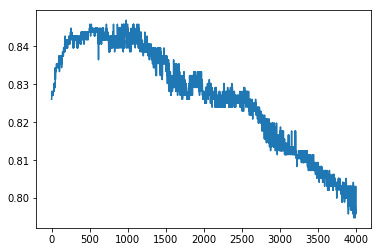

In [87]:
#output final accuracy
finalValidationBinaryAccuracy = binaryClassifierHistoryFinal[ 'val_binary_accuracy' ] 


matplotlib.pyplot.plot( range( 4000 ), finalValidationBinaryAccuracy );
